<a href="https://colab.research.google.com/github/aditya26droid/United_Airline/blob/main/United.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [102]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

In [103]:
import warnings
warnings.filterwarnings('ignore') # setting ignore as a parameter

In [104]:
s_data= pd.read_csv("/content/Survey data_Inflight Satisfaction Score.csv")

In [105]:
s_data.head()

,flight_number,origin_station_code,destination_station_code,record_locator,scheduled_departure_date,question_text,score,satisfaction_type,driver_sub_group1,driver_sub_group2,...,equipment_type_code,ua_uax,actual_flown_miles,haul_type,departure_gate,arrival_gate,international_domestic_indicator,response_group,media_provider,hub_spoke
0,3802,MKX,ORX,CYXXJJ,9/1/2022,How satisfied were you with the food & beverag...,2,Dissatisfied,food & beverage,food and beverage satisfaction,...,CRZ,UAX,67,Short,C12,F10,Domestic,non-member,NaN,spoke departure
1,4645,COX,DEX,DRXXMH,9/1/2022,How satisfied were you with the food & beverag...,5,Satisfied,food & beverage,food and beverage satisfaction,...,E75,UAX,72,Short,5,B60,Domestic,member,GOGO,spoke departure
2,5236,COX,DEX,DEXXS1,9/1/2022,How satisfied were you with the food & beverag...,5,Satisfied,food & beverage,food and beverage satisfaction,...,E75,UAX,72,Short,7,A71,Domestic,member,GOGO,spoke departure
3,4686,DEX,COX,PXXXLH,9/1/2022,How satisfied were you with the food & beverag...,3,Dissatisfied,food & beverage,food and beverage satisfaction,...,CRJ,UAX,72,Short,B82,5,Domestic,member,NaN,hub departure
4,671,DEX,COX,KZXXH5,9/1/2022,How satisfied were you with the food & beverag...,5,Satisfied,food & beverage,food and beverage satisfaction,...,19F,UA,72,Short,B24,3,Domestic,member,PANASONIC,hub departure


In [106]:
s_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47074 entries, 0 to 47073
Data columns (total 31 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   flight_number                     47074 non-null  int64 
 1   origin_station_code               47074 non-null  object
 2   destination_station_code          47074 non-null  object
 3   record_locator                    47074 non-null  object
 4   scheduled_departure_date          47074 non-null  object
 5   question_text                     47074 non-null  object
 6   score                             47074 non-null  object
 7   satisfaction_type                 34963 non-null  object
 8   driver_sub_group1                 47074 non-null  object
 9   driver_sub_group2                 47074 non-null  object
 10  arrival_delay_minutes             47074 non-null  int64 
 11  arrival_delay_group               47074 non-null  object
 12  cabin_code_desc   

In [107]:
s_data["question_text"].unique()

array(['How satisfied were you with the food & beverage served on your flight from [CITY] to [CITY]?',
       'What item did you choose?'], dtype=object)

In [108]:
s_data_1=s_data[s_data["question_text"]=='How satisfied were you with the food & beverage served on your flight from [CITY] to [CITY]?']

In [109]:
s_data_2=s_data[s_data["question_text"]=='What item did you choose?']

In [110]:
s_data_2['score'].unique()

array(['chicken entrée', 'other (specify)', 'vegetarian entrée',
       'snack basket selection', 'sandwich/burger/wrap', 'beef entrée',
       'seafood entrée'], dtype=object)

In [111]:
s_data_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34963 entries, 0 to 47071
Data columns (total 31 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   flight_number                     34963 non-null  int64 
 1   origin_station_code               34963 non-null  object
 2   destination_station_code          34963 non-null  object
 3   record_locator                    34963 non-null  object
 4   scheduled_departure_date          34963 non-null  object
 5   question_text                     34963 non-null  object
 6   score                             34963 non-null  object
 7   satisfaction_type                 34963 non-null  object
 8   driver_sub_group1                 34963 non-null  object
 9   driver_sub_group2                 34963 non-null  object
 10  arrival_delay_minutes             34963 non-null  int64 
 11  arrival_delay_group               34963 non-null  object
 12  cabin_code_desc   

In [112]:
rating=s_data_1["score"].value_counts().sort_index()
rating

1    7713
2    8250
3    6390
4    5877
5    6733
Name: score, dtype: int64

Text(0.5, 0, 'No of Customers')

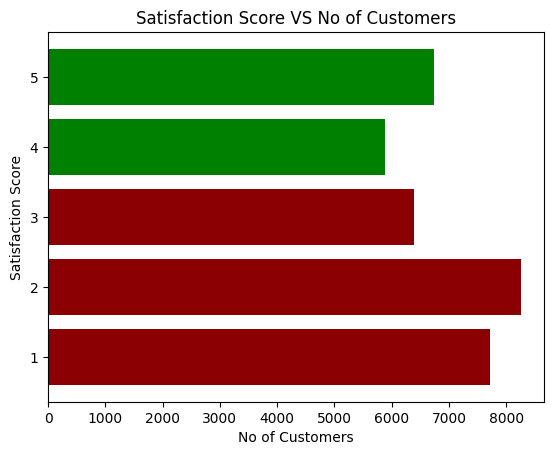

In [113]:
colors = ['#8B0000','#8B0000','#8B0000','g','g']
plt.barh(rating.index,rating.values,color=colors)
plt.title("Satisfaction Score VS No of Customers")
plt.ylabel("Satisfaction Score")
plt.xlabel("No of Customers")


In [114]:
s_data_1["score"]=s_data_1["score"].astype(str).astype(int)

Text(0.5, 1.0, 'Business Class Satisfaction')

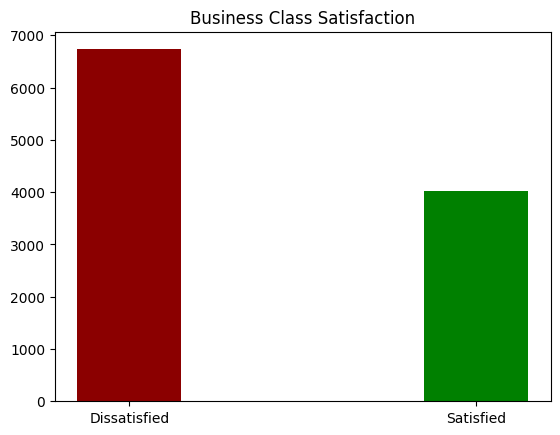

In [115]:
business=s_data_1[s_data_1['cabin_code_desc']=='Business']
economy=s_data_1[s_data_1['cabin_code_desc']=='Economy']
premium=s_data_1[s_data_1['cabin_code_desc']=='United Premium Plus']
business=business['satisfaction_type'].value_counts().sort_index()
economy=economy['satisfaction_type'].value_counts().sort_index()
premium=premium['satisfaction_type'].value_counts().sort_index()
plt.bar(business.index,business.values,width=0.3,color=['#8B0000','g'])
plt.title("Business Class Satisfaction")

Text(0.5, 1.0, 'Business Class Satisfaction')

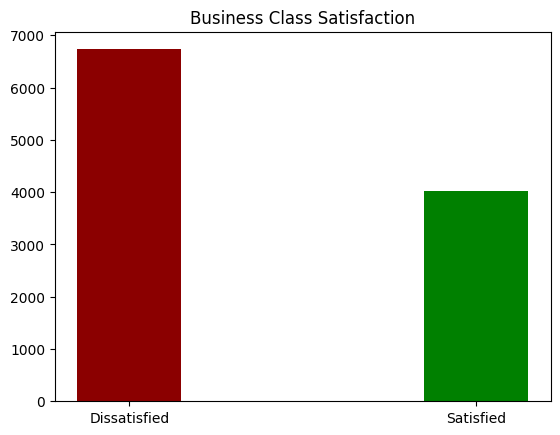

In [116]:
business=s_data_1[s_data_1['cabin_code_desc']=='Business']
economy=s_data_1[s_data_1['cabin_code_desc']=='Economy']
premium=s_data_1[s_data_1['cabin_code_desc']=='United Premium Plus']
business=business['satisfaction_type'].value_counts().sort_index()
economy=economy['satisfaction_type'].value_counts().sort_index()
premium=premium['satisfaction_type'].value_counts().sort_index()
plt.bar(business.index,business.values,width=0.3,color=['#8B0000','g'])
plt.title("Business Class Satisfaction")

Text(0.5, 1.0, 'Economy Class Satisfaction')

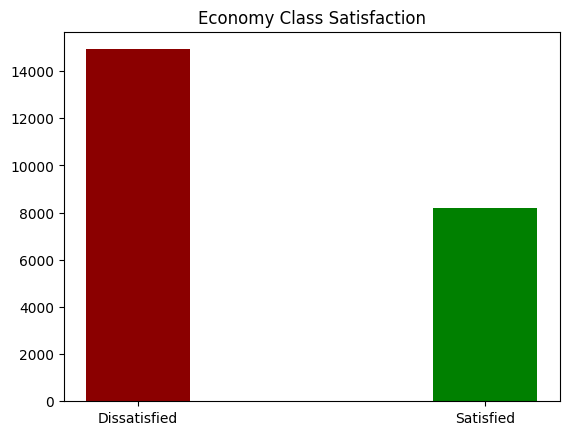

In [117]:
plt.bar(economy.index,economy.values,width=0.3,color=['#8B0000','g'])
plt.title("Economy Class Satisfaction")

Text(0.5, 1.0, 'Premium Class Satisfaction')

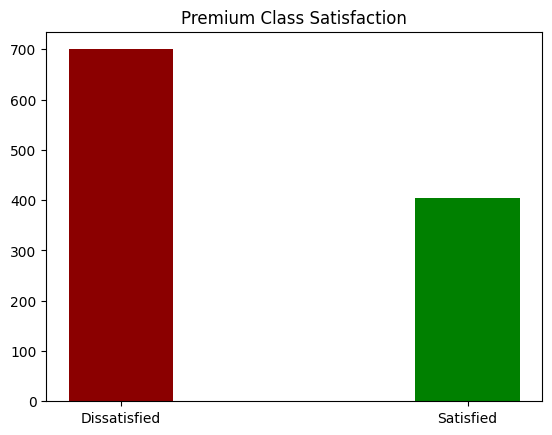

In [118]:
plt.bar(premium.index,premium.values,width=0.3,color=['#8B0000','g'])
plt.title("Premium Class Satisfaction")

In [119]:
s_data_1['arrival_delay_group'].replace({'Early & Ontime':0,'Delayed':1},inplace=True)

In [120]:
s_data_1['haul_type'].unique()

array(['Short', 'Medium', 'Long'], dtype=object)

In [121]:
s_data_1['hub_spoke'].replace({'spoke departure':0,'hub departure':1,'nan':2},inplace=True)

In [122]:
s_data_1['haul_type'].replace({'Short':0,'Medium':1,'Long':2},inplace=True)

In [123]:
s_data_1.corr()

,flight_number,score,arrival_delay_minutes,arrival_delay_group,number_of_legs,actual_flown_miles,haul_type,hub_spoke
flight_number,1.000000,0.039105,-0.018159,-0.055743,0.134087,-0.530168,-0.558623,0.022246
score,0.039105,1.000000,-0.079356,-0.065704,0.026083,-0.089332,-0.059073,0.001170
arrival_delay_minutes,-0.018159,-0.079356,1.000000,0.581408,0.019983,0.041139,0.027629,0.052806
arrival_delay_group,-0.055743,-0.065704,0.581408,1.000000,0.004954,0.102452,0.087983,0.059838
number_of_legs,0.134087,0.026083,0.019983,0.004954,1.000000,-0.141848,-0.170592,0.071666
actual_flown_miles,-0.530168,-0.089332,0.041139,0.102452,-0.141848,1.000000,0.843573,-0.062443
haul_type,-0.558623,-0.059073,0.027629,0.087983,-0.170592,0.843573,1.000000,-0.067718
hub_spoke,0.022246,0.001170,0.052806,0.059838,0.071666,-0.062443,-0.067718,1.000000


Text(0.5, 1.0, 'Ratio of Satisfied and Unsatisfied in Domestic Entity')

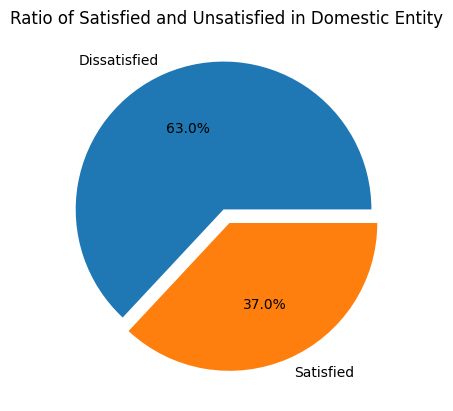

In [124]:
domestic=s_data_1[s_data_1['entity']=='Domestic']
plt.pie(domestic['satisfaction_type'].value_counts(),labels=domestic['satisfaction_type'].value_counts().index,explode=[0.05,0.05],autopct='%1.1f%%')
plt.title("Ratio of Satisfied and Unsatisfied in Domestic Entity")

Text(0.5, 1.0, 'Ratio of Satisfied and Unsatisfied in Latin Entity')

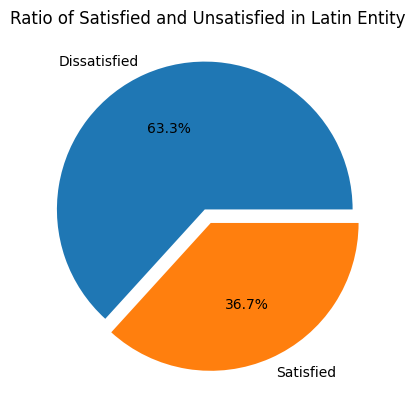

In [125]:
Latin=s_data_1[s_data_1['entity']=='Latin']
plt.pie(Latin['satisfaction_type'].value_counts(),labels=Latin['satisfaction_type'].value_counts().index,explode=[0.05,0.05],autopct='%1.1f%%')
plt.title("Ratio of Satisfied and Unsatisfied in Latin Entity")

In [126]:
s_data_1['entity'].unique()

array(['Domestic', 'Pacific', 'Latin', 'Atlantic', nan], dtype=object)

Text(0.5, 1.0, 'Ratio of Satisfied and Unsatisfied in Pacific Entity')

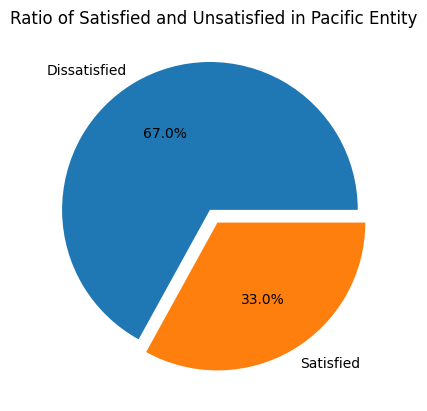

In [127]:
Pacific=s_data_1[s_data_1['entity']=='Pacific']
plt.pie(Pacific['satisfaction_type'].value_counts(),labels=Pacific['satisfaction_type'].value_counts().index,explode=[0.05,0.05],autopct='%1.1f%%')
plt.title("Ratio of Satisfied and Unsatisfied in Pacific Entity")

Text(0.5, 1.0, 'Ratio of Satisfied and Unsatisfied in Atlantic Entity')

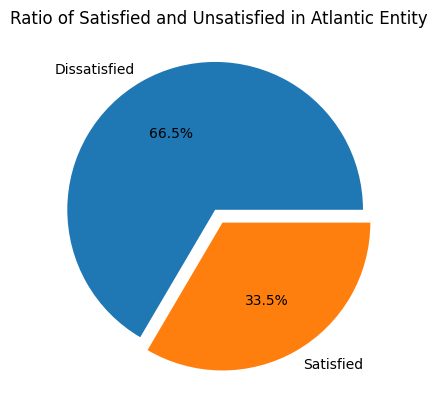

In [128]:
Atlantic=s_data_1[s_data_1['entity']=='Atlantic']
plt.pie(Atlantic['satisfaction_type'].value_counts(),labels=Atlantic['satisfaction_type'].value_counts().index,explode=[0.05,0.05],autopct='%1.1f%%')
plt.title("Ratio of Satisfied and Unsatisfied in Atlantic Entity")

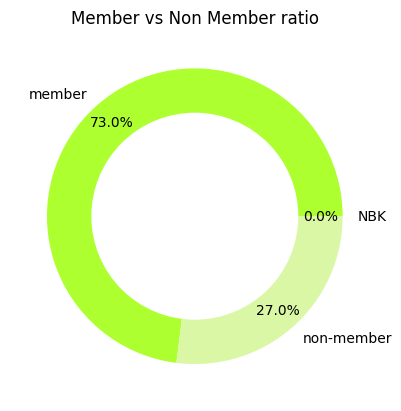

In [147]:
plt.pie(s_data_1['response_group'].value_counts(),labels=s_data_1['response_group'].value_counts().index,autopct='%1.1f%%', pctdistance=0.85,colors=['#ADFF2F','#DAF7A6','#FFA500'])
plt.title("Member vs Non Member ratio")
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)


In [148]:
member =s_data_1[s_data_1['response_group']=="member"]

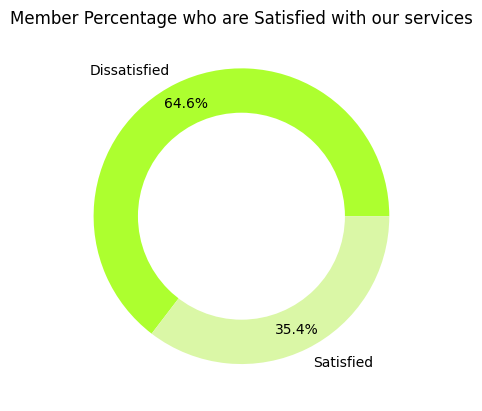

In [151]:
plt.pie(member['satisfaction_type'].value_counts(),labels=member['satisfaction_type'].value_counts().index,autopct='%1.1f%%', pctdistance=0.85,colors=['#ADFF2F','#DAF7A6'])
plt.title("Member Percentage who are Satisfied with our services")
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

In [155]:
food_data=pd.read_csv("/content/2023_0827_0251.csv")

In [158]:
food_data

,ENTREE_DESCRIPTION,COUNTER
0,Zatar chicken,3291
1,Impossible Meatball Bowl,3267
2,Brioche cheeseburger,1506
3,Belgium waffle,1123
4,Scrambled eggs,1123
...,...,...
81,Mushroom omelette,1
82,Omelette entree,1
83,Raisin French toast,1
84,Seared beef shortrib,1


In [160]:
preorder=pd.read_csv("/content/Inflight Service_Pre order data.csv")

In [161]:
preorder

,flight_number,departure_station_code,arrival_station_code,record_locator,carrier_code,scheduled_departure_dtl,cabin_code,meal_group,meal_category,meal_short_description,meal_description,is_entree,pre_order_qty
0,1423,INX,DEX,B3XX1H,UA,9/1/2022,J,ENTREES HOT,POULTRY,"Za'atar chicken with spinach, roasted peppers,...","Za'atar chicken with spinach, roasted peppers,...",Y,1
1,1620,IAX,CUX,BFXXJC,UA,9/2/2022,J,ENTREES HOT,BREAKFAST,Tomato and kale baked egg,Tomato and kale baked egg with fire roasted re...,Y,2
2,1852,ORX,PDX,DPXX2H,UA,9/2/2022,J,ENTREES HOT,BREAKFAST,Tomato and kale baked egg,Tomato and kale baked egg with fire roasted re...,Y,1
3,548,IAX,SFX,ELXX8H,UA,9/2/2022,J,ENTREES HOT,BREAKFAST,Scrambled eggs,"Scrambled eggs with ham, onion and peppers",Y,2
4,1155,IAX,CUX,NCXX4S,UA,9/2/2022,J,ENTREES HOT,BREAKFAST,Belgium waffle,Belgium waffle with bourbon banana fosters sau...,Y,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
212034,2189,DEX,FLX,PDXXCY,UA,9/14/2022,Y,UNITED CATERER OWNED 88-3F,SNACKS,SkinnyDipped® Lemon Bliss Almonds,NaN,N,1
212035,1618,LAX,ORX,KZXXFK,UA,9/14/2022,Y,NaN,NaN,Sparkling Wine,NaN,NaN,1
212036,1498,SFX,IAX,O3XX7J,UA,9/11/2022,Y,ALCOHOL BEVERAGES,GENERIC INT WINE A,Red Wine,Red Wine 187ml,N,1
212037,1830,EWX,SFX,BQXXYW,UA,9/14/2022,Y,LIQUOR,LIQUOR,Buffalo Trace,NaN,N,1


import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(preorder, *['flight_number'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(preorder, *['pre_order_qty'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(preorder, *['flight_number'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(preorder, *['pre_order_qty'], **{})
chart

import numpy as np
from google.colab import autoviz

def categorical_histogram(df, colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  df.groupby(colname).size().plot(kind='barh', color=sns.palettes.mpl_palette(mpl_palette_name), figsize=(8*figscale, 4.8*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(preorder, *['cabin_code'], **{})
chart

import numpy as np
from google.colab import autoviz

def categorical_histogram(df, colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  df.groupby(colname).size().plot(kind='barh', color=sns.palettes.mpl_palette(mpl_palette_name), figsize=(8*figscale, 4.8*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(preorder, *['meal_group'], **{})
chart

import numpy as np
from google.colab import autoviz

def categorical_histogram(df, colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  df.groupby(colname).size().plot(kind='barh', color=sns.palettes.mpl_palette(mpl_palette_name), figsize=(8*figscale, 4.8*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(preorder, *['is_entree'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plots(df, colname_pairs, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * 6 * figscale, 6 * figscale))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha, ax=ax)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(preorder, *[[['flight_number', 'pre_order_qty']]], **{})
chart

import numpy as np
from google.colab import autoviz

def heatmap(df, x_colname, y_colname, figscale=1, mpl_palette_name='viridis'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  import pandas as pd
  plt.subplots(figsize=(8 * figscale, 8 * figscale))
  df_2dhist = pd.DataFrame({
      x_label: grp[y_colname].value_counts()
      for x_label, grp in df.groupby(x_colname)
  })
  sns.heatmap(df_2dhist, cmap=mpl_palette_name)
  plt.xlabel(x_colname)
  plt.ylabel(y_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = heatmap(preorder, *['cabin_code', 'meal_group'], **{})
chart

import numpy as np
from google.colab import autoviz

def heatmap(df, x_colname, y_colname, figscale=1, mpl_palette_name='viridis'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  import pandas as pd
  plt.subplots(figsize=(8 * figscale, 8 * figscale))
  df_2dhist = pd.DataFrame({
      x_label: grp[y_colname].value_counts()
      for x_label, grp in df.groupby(x_colname)
  })
  sns.heatmap(df_2dhist, cmap=mpl_palette_name)
  plt.xlabel(x_colname)
  plt.ylabel(y_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = heatmap(preorder, *['meal_group', 'is_entree'], **{})
chart

import numpy as np
from google.colab import autoviz

def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (12 * figscale, 1.2 * figscale * len(df[facet_colname].unique()))
  plt.figure(figsize=figsize)
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(preorder, *['flight_number', 'cabin_code'], **{'inner': 'box'})
chart

import numpy as np
from google.colab import autoviz

def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (12 * figscale, 1.2 * figscale * len(df[facet_colname].unique()))
  plt.figure(figsize=figsize)
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(preorder, *['flight_number', 'meal_group'], **{'inner': 'box'})
chart

import numpy as np
from google.colab import autoviz

def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (12 * figscale, 1.2 * figscale * len(df[facet_colname].unique()))
  plt.figure(figsize=figsize)
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(preorder, *['flight_number', 'is_entree'], **{'inner': 'box'})
chart

import numpy as np
from google.colab import autoviz

def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (12 * figscale, 1.2 * figscale * len(df[facet_colname].unique()))
  plt.figure(figsize=figsize)
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(preorder, *['pre_order_qty', 'cabin_code'], **{'inner': 'box'})
chart

In [163]:
import numpy as np
from google.colab import autoviz

def categorical_histogram(df, colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  df.groupby(colname).size().plot(kind='barh', color=sns.palettes.mpl_palette(mpl_palette_name), figsize=(8*figscale, 4.8*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(preorder, *['meal_group'], **{})
chart

In [162]:
import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(preorder, *['pre_order_qty'], **{})
chart